## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read Data

In [2]:
df_sentiment = pd.read_csv("fear_greed_index.csv")
df_trader = pd.read_csv("historical_data.csv")

In [3]:
df_trader

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [4]:
df_sentiment

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [5]:
# Check the feature in the given dataset
df_sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [6]:
df_trader.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [7]:
# Check the missing values of datasets

df_trader.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [8]:
df_sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [9]:
df_trader.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [10]:
df_sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [11]:
df_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


## Data Pre-Processing and Cleaning

In [13]:
df_trader.duplicated().sum()

np.int64(0)

In [14]:
df_sentiment.duplicated().sum()

np.int64(0)

In [15]:
# Convert Time-Stamp to Date Format

df_trader["date"] = pd.to_datetime(df_trader["Timestamp IST"], format = "%d-%m-%Y %H:%M", errors = 'coerce').dt.normalize()

In [16]:
# Convert sentiment dataset date column to datetime

df_sentiment["date"] = pd.to_datetime(df_sentiment["date"],errors = 'coerce')

In [17]:
df_trader["date"]

0        2024-12-02
1        2024-12-02
2        2024-12-02
3        2024-12-02
4        2024-12-02
            ...    
211219   2025-04-25
211220   2025-04-25
211221   2025-04-25
211222   2025-04-25
211223   2025-04-25
Name: date, Length: 211224, dtype: datetime64[ns]

In [18]:
df_sentiment["date"]

0      2018-02-01
1      2018-02-02
2      2018-02-03
3      2018-02-04
4      2018-02-05
          ...    
2639   2025-04-28
2640   2025-04-29
2641   2025-04-30
2642   2025-05-01
2643   2025-05-02
Name: date, Length: 2644, dtype: datetime64[ns]

In [19]:
df_trader.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST               object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
date                datetime64[ns]
dtype: object

In [20]:
df_sentiment.dtypes

timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

# Merge Datasets on Date

In [21]:
# Merge traded dateset with sentiment classificationn on date
df_merged = pd.merge(df_trader, df_sentiment[['date', 'classification']], on = 'date', how='left')

In [22]:
df_merged

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed


## Summary Statistics by Sentiment

In [23]:
summary = df_merged.groupby("classification").agg({
    "Closed PnL":["mean", "median"],                # Mean and median of profit/loss
    "Size USD":"mean",                              # Average position size in USD
    "Execution Price":"mean",                       # Average execution price
    "Fee":"mean"}).round(2)                         # Average fee paid

In [24]:
# Flatten multi-level column index

summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = summary.reset_index()
print(summary)

  classification  Closed PnL_mean  Closed PnL_median  Size USD_mean  \
0   Extreme Fear            34.54                0.0        5349.73   
1  Extreme Greed            67.89                0.0        3112.25   
2           Fear            54.29                0.0        7816.11   
3          Greed            42.74                0.0        5736.88   
4        Neutral            34.31                0.0        4782.73   

   Execution Price_mean  Fee_mean  
0               7054.80      1.12  
1               6082.20      0.68  
2              14152.62      1.50  
3              13411.28      1.25  
4              12393.69      1.04  


## Visualization: Avg closed PnL by Sentiment

C:\Users\Ritik\AppData\Local\Temp\ipykernel_30400\698067266.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_merged, x = "classification", y = "Closed PnL", estimator = "mean", ci = None, palette = "coolwarm")
C:\Users\Ritik\AppData\Local\Temp\ipykernel_30400\698067266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_merged, x = "classification", y = "Closed PnL", estimator = "mean", ci = None, palette = "coolwarm")


<function matplotlib.pyplot.show(close=None, block=None)>

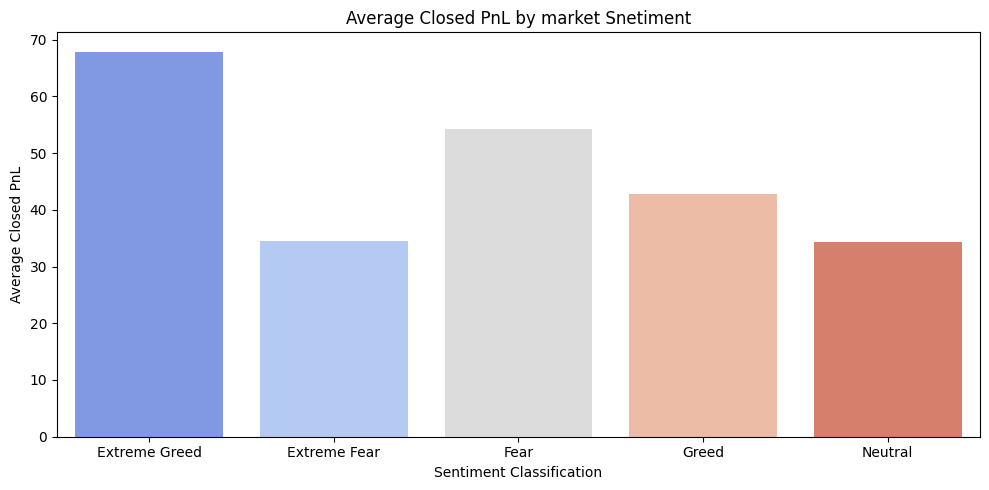

In [25]:
# Plot average Closed PnL for each sentiment category

plt.figure(figsize=(10,5))
sns.barplot(data=df_merged, x = "classification", y = "Closed PnL", estimator = "mean", ci = None, palette = "coolwarm")
plt.title("Average Closed PnL by market Snetiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Sentiment Classification")
plt.grid(False)
plt.tight_layout()
plt.show
            

## Side-wise Performance Analysis (Buy vs Sell)

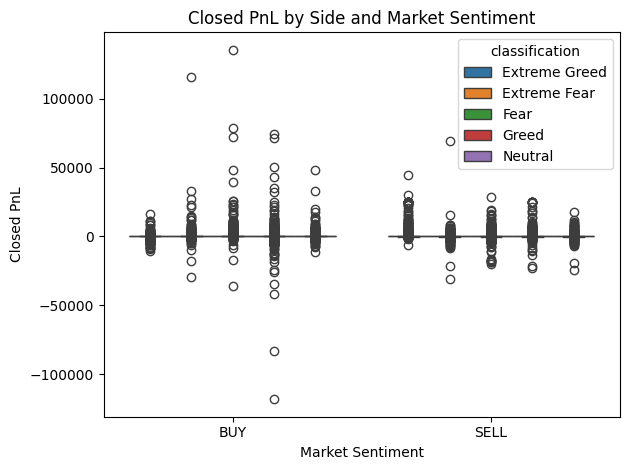

In [26]:
# Boxplot showing the distribution of Closed PnL based on trade side and sentiment

sns.boxplot(data= df_merged, x = "Side", y = "Closed PnL", hue = "classification")
plt.title("Closed PnL by Side and Market Sentiment")
plt.xlabel ("Market Sentiment")
plt.tight_layout()
plt.show()

## Daily PnL Trend Over Time

In [27]:
# Claculate average daily Closed PnL
daily_pnl = df_merged.groupby("date")["Closed PnL"].mean().reset_index()

In [28]:
daily_pnl

,date,Closed PnL
0,2023-05-01,0.000000
1,2023-12-05,0.000000
2,2023-12-14,-18.675885
3,2023-12-15,-12.316017
4,2023-12-16,0.000000
...,...,...
475,2025-04-27,8.018004
476,2025-04-28,26.763462
477,2025-04-29,56.063136
478,2025-04-30,12.582028


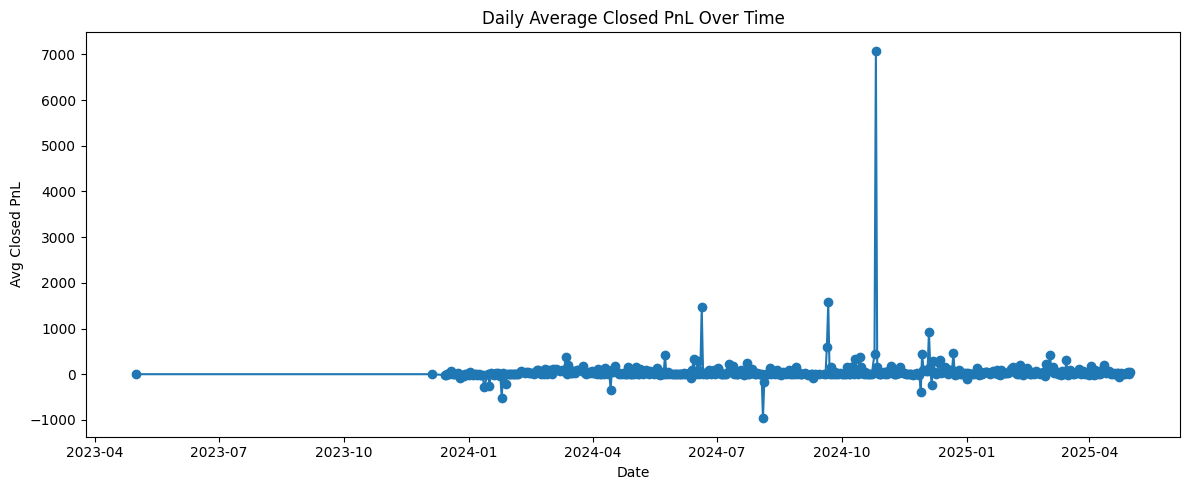

In [29]:
# plot PnL tren over time

plt.figure(figsize=(12,5))
plt.plot(daily_pnl["date"], daily_pnl["Closed PnL"], marker = 'o')
plt.title("Daily Average Closed PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Closed PnL")
plt.tight_layout()
plt.show()

## Size USD vs PnL Analysis

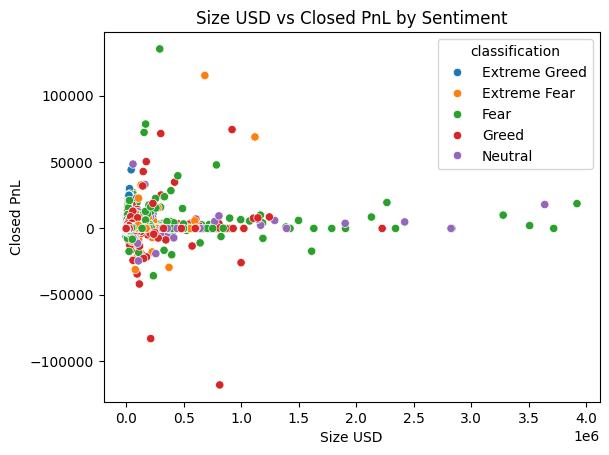

In [30]:
# Scatter plot of Size USD vs Closed PnL, color-coded by sentiment
sns.scatterplot(data= df_merged, x ="Size USD", y = "Closed PnL", hue = "classification")
plt.title("Size USD vs Closed PnL by Sentiment")
plt.show()

## Strategy Recommendation

In [31]:
# Display average Size USD and PnL grouped by sentiment to draw insights

strategy = df_merged.groupby("classification")[["Size USD","Closed PnL"]].mean().round(2)
print("Recommended strategy Insights:", strategy)

Recommended strategy Insights:                 Size USD  Closed PnL
classification                      
Extreme Fear     5349.73       34.54
Extreme Greed    3112.25       67.89
Fear             7816.11       54.29
Greed            5736.88       42.74
Neutral          4782.73       34.31


## Symbol Specific Performance

In [34]:
# Calculating average PnL for each trading symbol under each sentiment classification

symbol_perf = df_merged.groupby(["Coin", "classification"])["Closed PnL"].mean().unstack().round(2)
print("Symbol-wise Avg PnL under Each sentiment:", symbol_perf)

Symbol-wise Avg PnL under Each sentiment: classification  Extreme Fear  Extreme Greed   Fear  Greed  Neutral
Coin                                                              
@1                       NaN          18.36   0.00   0.18      NaN
@10                    -0.03            NaN   0.00   0.00      NaN
@100                     NaN           6.91    NaN    NaN      NaN
@103                     NaN           6.81    NaN   2.25      NaN
@107                  -89.59         191.16  -2.29  86.25    52.15
...                      ...            ...    ...    ...      ...
kBONK                    NaN          50.27  24.74  -2.72     0.90
kFLOKI                   NaN          50.22    NaN  15.54     4.08
kNEIRO                   NaN            NaN    NaN   2.04    -2.84
kPEPE                   0.23          22.34  31.46 -14.88    -0.95
kSHIB                   0.00           8.83  13.64   0.00     0.53

[246 rows x 5 columns]


## Statistical Testing (T-test: Fear vs Greed)

In [35]:
## import the libraries

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [37]:
# Extract PnL values for each sentiment

fear_pnl = df_merged[df_merged["classification"] == "fear"]["Closed PnL"]
greed_pnl = df_merged[df_merged["classification"] == "Greed"]["Closed PnL"]

In [38]:
fear_pnl

Series([], Name: Closed PnL, dtype: float64)

In [39]:
greed_pnl

393         60.225802
394        534.913725
395       1110.165507
396        493.193715
397        534.025855
             ...     
211219     -20.256600
211220    -112.577300
211221     -22.440200
211222    -190.789400
211223     -53.906300
Name: Closed PnL, Length: 50303, dtype: float64

In [40]:
## Perform independent t-test to compare means

In [42]:
t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var = False)
print (f"T-test between Fear and Greed PnLs: t-stat = {t_stat:.3f}, p = {p_val:.3f}")

T-test between Fear and Greed PnLs: t-stat = nan, p = nan


## Predictive Model (Random Forest)

In [43]:
## Create a binary target variable: 1 if PnL > 0 else 0

df_merged["PnL_Positive"] = (df_merged["Closed PnL"] > 0).astype(int)

In [45]:
# Select features for model input and handle any missing values

features = df_merged[["Size USD", "Execution Price"]].fillna(0)
target = df_merged["PnL_Positive"]

In [47]:
# Split data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [48]:
# Train a Random Forest Classifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Predict on test set

y_pred = model.predict(X_test)

In [50]:
# Show model evalution report

print ("Random Forest Classification Report:")
print (classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81     24802
           1       0.74      0.67      0.70     17443

    accuracy                           0.76     42245
   macro avg       0.76      0.75      0.75     42245
weighted avg       0.76      0.76      0.76     42245



### As for the model it performs better at identifying non-profitable trades (Class 0) than profitable ones.

### Slight class imbalance: 24.8k negative vs 17.4k positive trades.